# Data Visualisation 2

Now we've got the basics down, in this session we'll look at how to make a figure ready for a report, poster, or presentation.

In addition to the packages we used in the last session, you'll ned to make sure you have `colorBlindness` and `patchwork` installed.

In [63]:
options(repr.plot.width=5, repr.plot.height=4)

In [64]:
library(ggplot2)  # for plotting
library(dplyr)    # for data wrangling
library(tidyr)    # for data wrangling
library(readr)    # for importing data

library(Cairo)           # for saving plots with antialiasing
library(colorBlindness)  # for simulating colour blindness
library(patchwork)       # for arranging plots

You can import the same data as in the last session:

In [65]:
exp_dat <- read_csv("https://raw.githubusercontent.com/JackEdTaylor/expra-wise23/master/lecture/static/data_vis_dat.csv")

Rows: 201 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (2): subj_id, time
dbl (2): read_score, memory_score

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Themes

There are several default themes built into `ggplot2`. These make it easy to quickly restyle a plot. For example, here is a plot from the last session, using the default `ggplot2` theme.

`geom_smooth()` using formula = 'y ~ x'


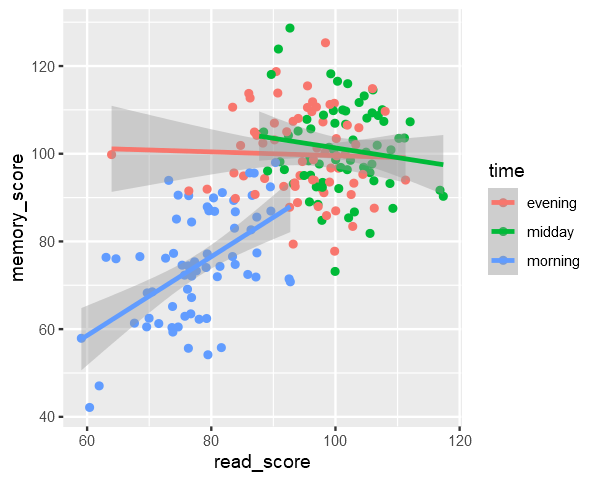

In [66]:
ggplot(exp_dat, aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm")

We can restyle this to be in a black-and-white theme with `theme_bw()`.

`geom_smooth()` using formula = 'y ~ x'


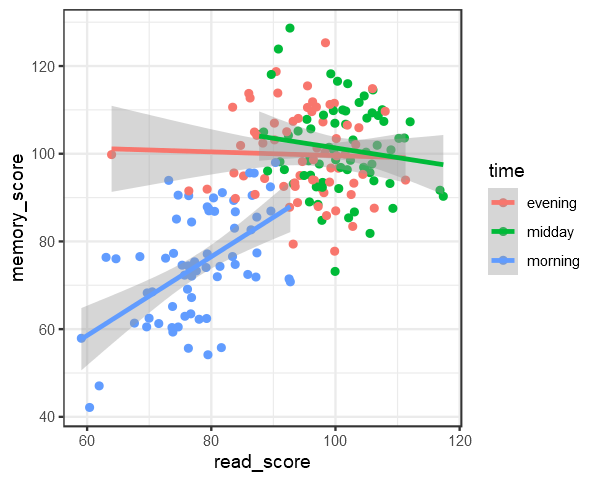

In [67]:
ggplot(exp_dat, aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_bw()

Another theme that tends to look quite good is `theme_classic()`.

`geom_smooth()` using formula = 'y ~ x'


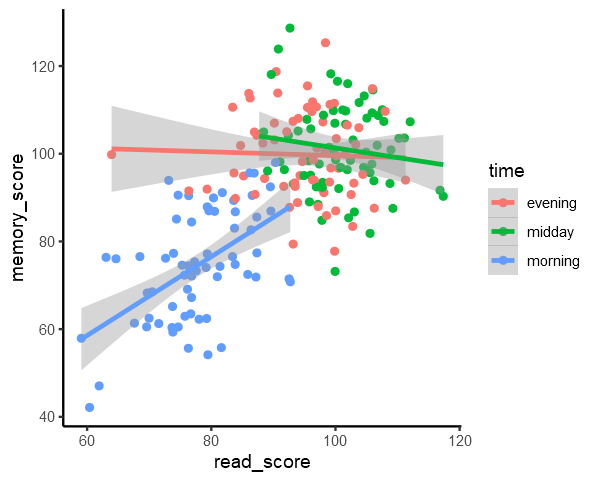

In [68]:
ggplot(exp_dat, aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic()

You can find a list of available themes on the [`ggplot2` documentation for complete themes](https://ggplot2.tidyverse.org/reference/ggtheme.html).

You can also edit specific elements in the theme with the `theme()` function. For example, we could make a very ugly graph by turning the axes purple like so:

`geom_smooth()` using formula = 'y ~ x'


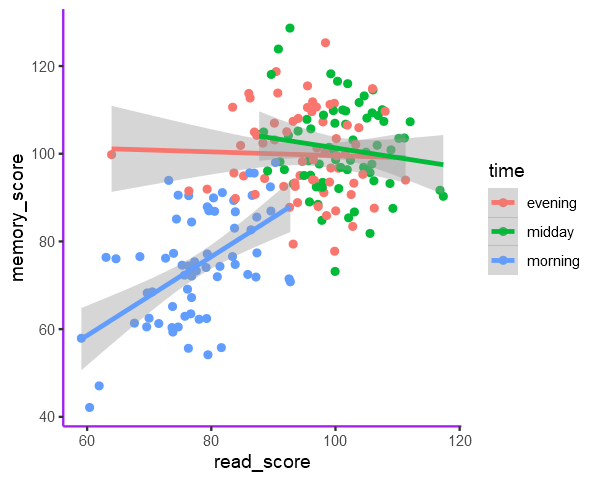

In [69]:
ggplot(exp_dat, aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  theme(axis.line = element_line(colour = "purple"))

You can find all arguments for the `theme()` function [in the documentation](https://ggplot2.tidyverse.org/reference/theme.html).

## Labels

The default labels in `ggplot2` are taken from the data. Having `read_score`, `memory_score`, and `time` as axis labels isn't very useful for someone trying to understand our figure. Instead, we can label them as "Reading Comprehension Score" and "N-Back Score". In a real report, you would also know the units, which you could put in brackets if appropriate, e.g., "Response Time (ms)".

We can pass the axis labels that we want to the `labs()` function.

`geom_smooth()` using formula = 'y ~ x'


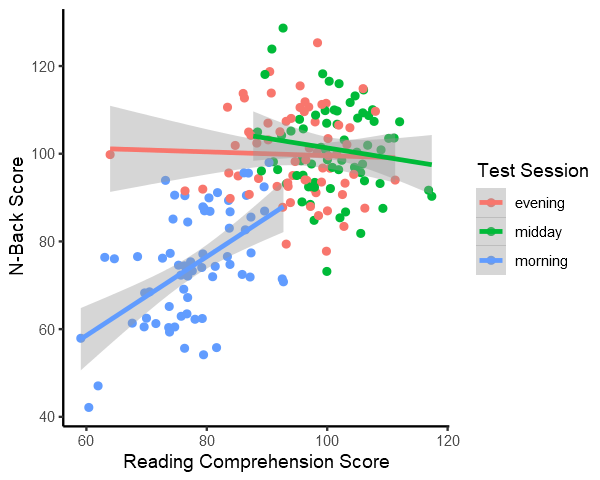

In [70]:
ggplot(exp_dat, aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
)

## Formatting Axes

In this case, the default breaks chosen by `ggplot2` make sense. However, we might decide that we want more than just 4 breaks on the x axis.

We can address this with the `scale_*` functions. For example, here we use `scale_x_continuous()` to have breaks from 60 to 120 in steps of 10.

`geom_smooth()` using formula = 'y ~ x'


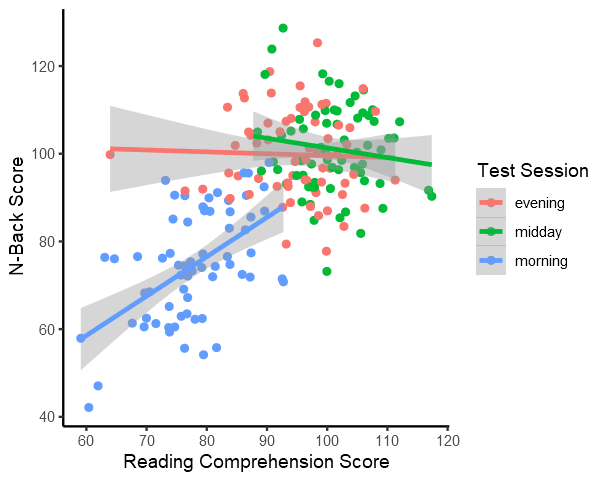

In [71]:
ggplot(exp_dat, aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
) +
scale_x_continuous(breaks = seq(60, 120, 10))

We could also pass a function to the `breaks` argument to do this for us. For example, `scales::breaks_pretty()` will automatically assign some sensible breaks. We can set `n=7` to ask for 7 breaks (or as close as possible while keeping the breaks sensible).

`geom_smooth()` using formula = 'y ~ x'


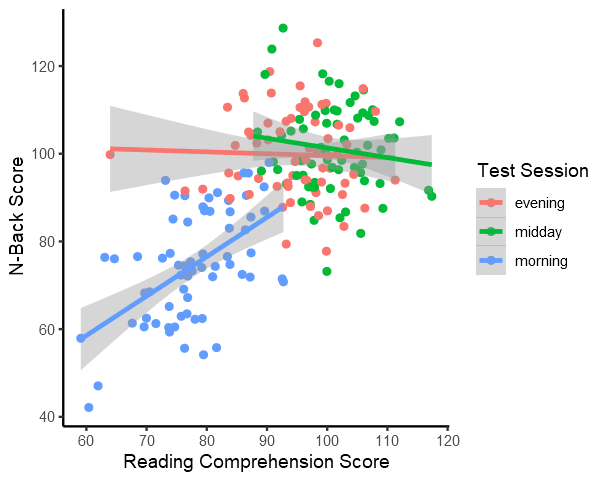

In [72]:
ggplot(exp_dat, aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
) +
scale_x_continuous(breaks = scales::breaks_pretty(n=7))

## Legends

Something that is still missing from the figure above is that the legend looks quite untidy:

* The labels for the time of day are out of order

* The labels for the time of day (*evening*. *midday*, and *morning*) are all in lower-case

* There is a lot of empty space above and below the legend

<br>
The easiest way to change the labels' order is to set the variable as a factor before creating the plot. This way, we can explicitly force the order to make sense. Notice that this changes the order of legend items:

`geom_smooth()` using formula = 'y ~ x'


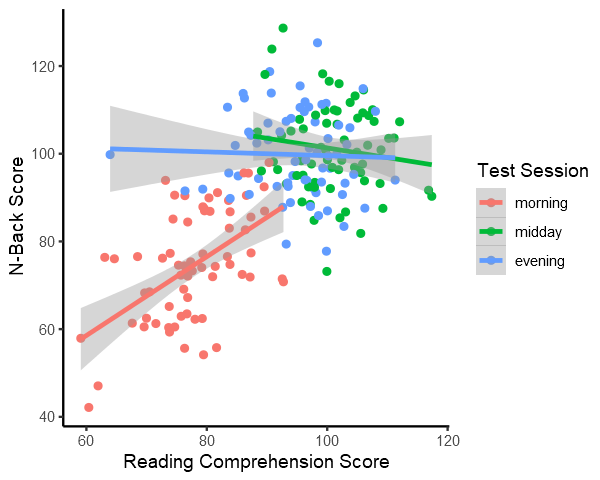

In [73]:
exp_dat |>
  mutate(time = factor(time, levels = c("morning", "midday", "evening"))) |>
  ggplot(aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
) 

We could use the same approach to change the legend labels. Here, we make the first letter upper-case:

`geom_smooth()` using formula = 'y ~ x'


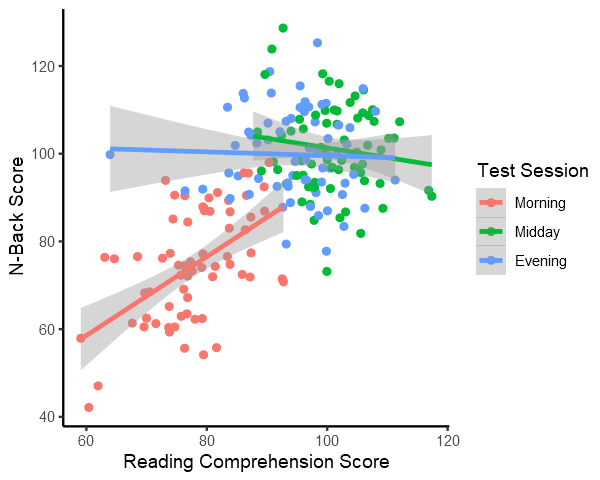

In [74]:
# set the order and labels for the time variable
exp_dat_fct <- exp_dat |>
  mutate(time = factor(
    time,
    levels = c("morning", "midday", "evening"),
    labels = c("Morning", "Midday", "Evening")
  ))

exp_dat_fct |>
  ggplot(aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
) 

Finally, we can move the legend to reduce the white space in the plot. We could move the figure to be above the plot like so with the `legend.position` argument of the `theme()` function:

`geom_smooth()` using formula = 'y ~ x'


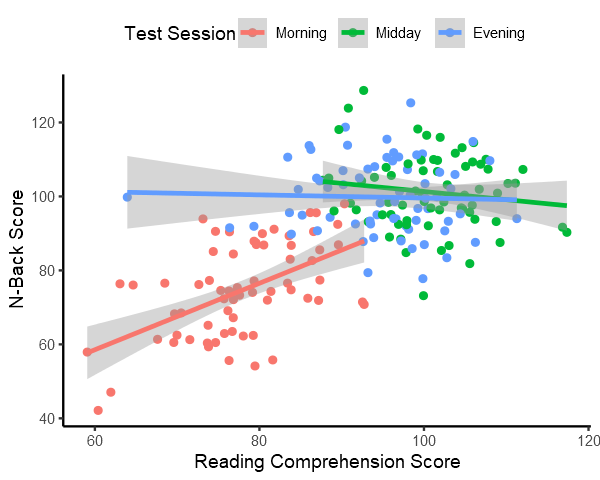

In [75]:
exp_dat_fct |>
  ggplot(aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
) +
theme(legend.position = "top")

We could also put the legend in that empty space at the bottom right section inside the plot.

We have to use standardised units between 0 and 1. We set the position to `c(1, 0)`, meaning to place the axis at 100% of the x axis, and 0% of the y axis. Here, we also set the justification to match, with `c(1, 0)`. This ensures that our legend is snug against the axes of the plot. Finally, we remove the legend background, to avoid occuluding any data.

`geom_smooth()` using formula = 'y ~ x'


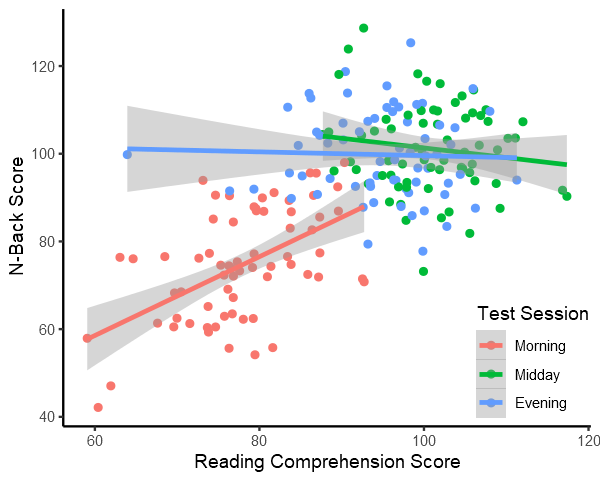

In [76]:
exp_dat_fct |>
  ggplot(aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
  ) +
  theme(
    legend.position = c(1, 0),
    legend.justification = c(1, 0),
    legend.background = element_blank()
  )

## Colour Blindness

You've probably noticed that our plots aren't very colourblind-friendly at the moment. In particular, two of our colours are red and green, which are very difficult to discriminate with red-green colourblindness. A very handy way to check if our plot is colourblind-friendly is the `cvdPlot()` function from the `colorBlindness` package.

If we assign our plot to a variable, we can simulate colour blindness like so:

In [77]:
options(repr.plot.width=8, repr.plot.height=7)

`geom_smooth()` using formula = 'y ~ x'


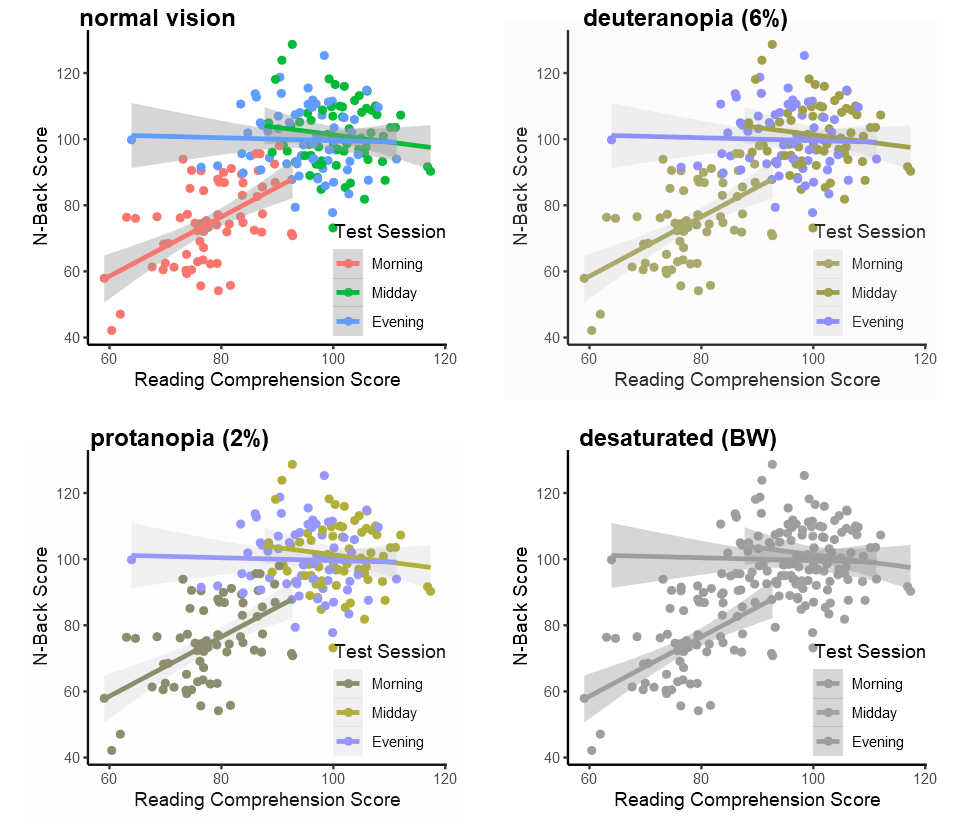

In [78]:
pl <- exp_dat_fct |>
  ggplot(aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
  ) +
  theme(
    legend.position = c(1, 0),
    legend.justification = c(1, 0),
    legend.background = element_blank()
  )

cvdPlot(pl)

People with deuteranopia and protanopia will have a hard time distinguishing our red and green colours. We could use viridis as alternative colours. This also makes sense because viridis is an ordered colour palette, and our time of day variable is ordered from Morning to Evening.

We use the `scale_colour_viridis_d()` function, which tells `ggplot2` to use the viridis palette for the colour mapping. The `_d` part refers to the fact that we are mapping to a discrete (categorical) variable.

`geom_smooth()` using formula = 'y ~ x'


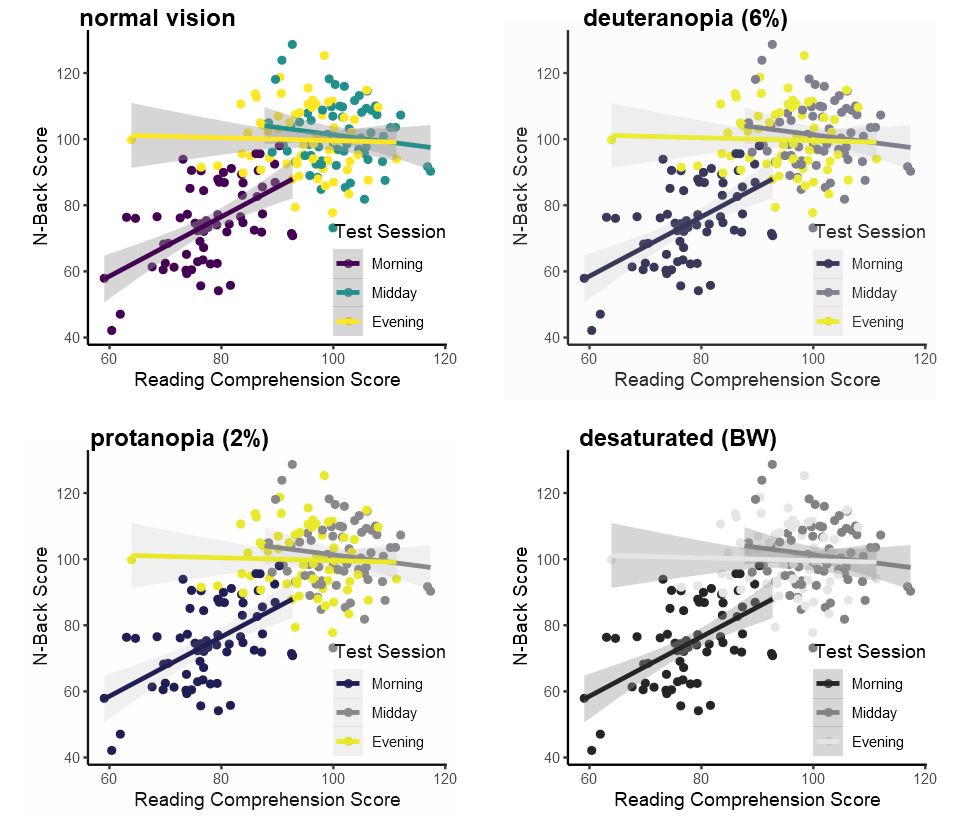

In [79]:
pl <- exp_dat_fct |>
  ggplot(aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
  ) +
  theme(
    legend.position = c(1, 0),
    legend.justification = c(1, 0),
    legend.background = element_blank()
  ) +
  scale_colour_viridis_d()

cvdPlot(pl)

In [80]:
options(repr.plot.width=7.5, repr.plot.height=3.5)

## Faceted Figures

If you have a lot of information, it is sometimes useful to have a panelled figure. Here, rather than overlaying data from different conditions, we may have a different subplot for each condition.

For this, `ggplot2` provides the `facet_*` functions. Here is an example using `facet_wrap()`.

`geom_smooth()` using formula = 'y ~ x'


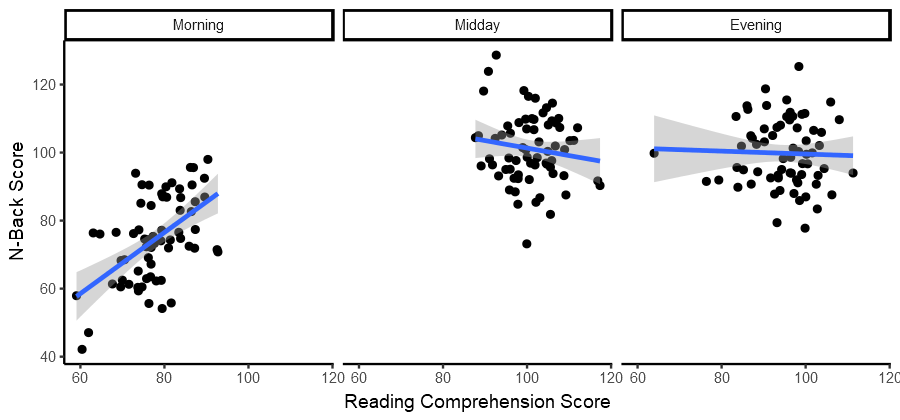

In [81]:
exp_dat_fct |>
  ggplot(aes(x=read_score, y=memory_score)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
  ) +
  facet_wrap(vars(time))

This can be especially useful if the plot would otherwise contain too much information.

In [82]:
options(repr.plot.width=4, repr.plot.height=3.5)

## Saving Figures

Let's imagine we are happy with this final plot.

`geom_smooth()` using formula = 'y ~ x'


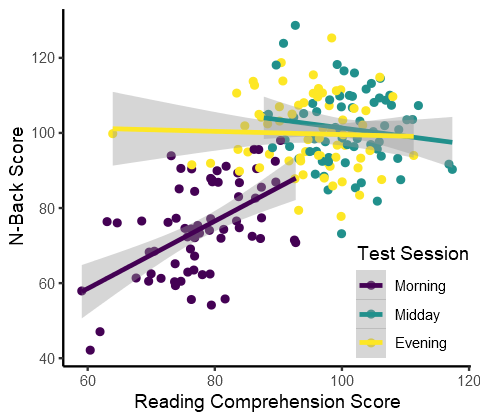

In [83]:
scatter_pl <- exp_dat_fct |>
  ggplot(aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm") +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session"
  ) +
  theme(
    legend.position = c(1, 0),
    legend.justification = c(1, 0),
    legend.background = element_blank()
  ) +
  scale_colour_viridis_d()

scatter_pl

### Saving Figures for a Report 

We can save it as a figure using `ggsave()`. Here we say to write `scatter_pl` to a file called `"my_plot.png"`, with width of 4 inches and height of 3.5 inches. We set `device="png"` and `type="cairo"` to avoid any aliasing artefacts.

```{r}
ggsave("my_plot.png", scatter_pl, width=4, height=3.5, device="png", type="cairo")
```

### Saving Figures for a Presentation 

In a presentation, you usually want to give your figures larger text so they are more readable. We can do this by changing the "base" text size in the `theme()` function. `ggplot2` will then automatically rescale all text to match.

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)

`geom_smooth()` using formula = 'y ~ x'


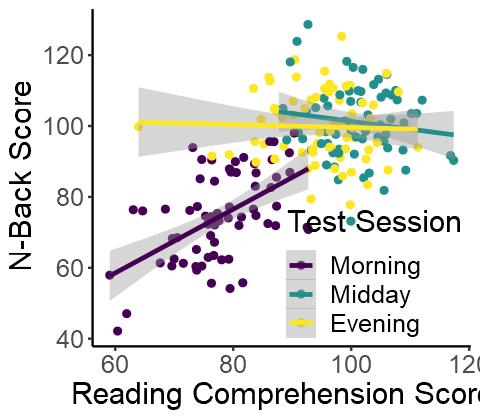

In [84]:
# set base text size to 18-point
scatter_pl_large <- scatter_pl +
  theme(text = element_text(size = 18))

scatter_pl_large

This introduces a problem where the last digit of "120" on the x axis is cut off

We can fix this by changing the the `plot.margin` parameter in `theme()`.

`geom_smooth()` using formula = 'y ~ x'


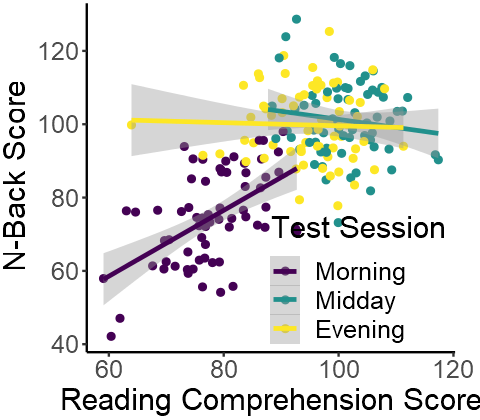

In [85]:
scatter_pl_large <- scatter_pl +
  theme(
    # set base text size to 18-point
    text = element_text(size = 18),
    # add some extra space to the right of the plot
    # (numbers are in the form top, right, bottom, left)
    plot.margin = margin(2, 15, 2, 2, unit="pt")
  )

scatter_pl_large

We could then save this larger figure to a size more suitable for a presentation, such as:

```{r}
ggsave("large_plot.png", scatter_pl_large, width=5.5, height=5.5, device="png", type="cairo")
```

### Saving Figures for a Poster

You could use the same approach as above to save a figure for a poster as a `.png` of suitable size. This will avoid any pixelation in your poster. However, as we mentioned in the slides, you may want to save the figure as a vector graphic, like a `.svg` file. For this, you will need to install the package, `svglite`.

```{r}
ggsave("large_plot.svg", scatter_pl_large, width=5.5, height=5.5)
```

You could then import this into software for designing posters which supports svg vector graphics, such as [Inkscape](https://inkscape.org/).

## Bonus: Panels

If you have a lot of information, it might make sense to have multiple panels. For example, let's imagine we want to combine the following three plots into one figure.

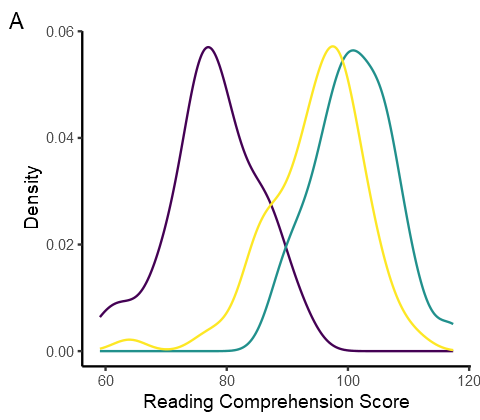

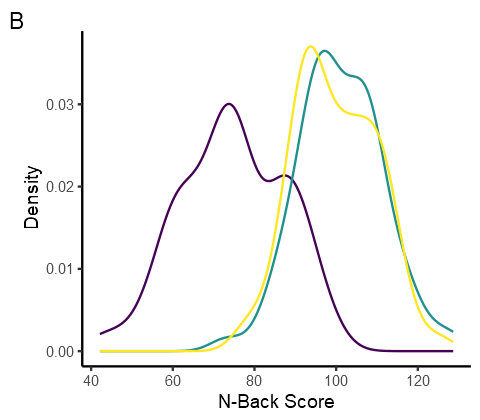

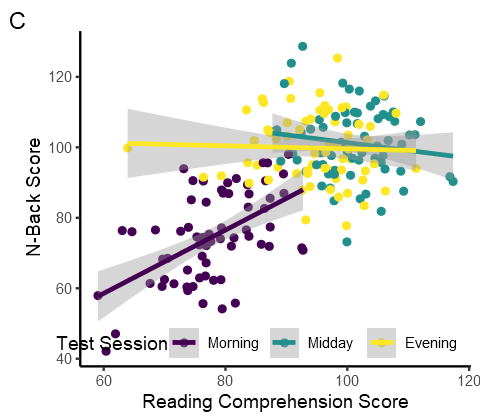

In [86]:
# plot the densities of reading scores
dens_read <- exp_dat_fct |>
  ggplot(aes(x=read_score, colour=time)) +
  geom_density() +
  scale_colour_viridis_d() +
  labs(
    x = "Reading Comprehension Score",
    y = "Density",
    tag = "A"
  ) +
  theme_classic() +
  theme(legend.position = "none")

dens_read

# plot the densities of reading scores
dens_memory <- exp_dat_fct |>
  ggplot(aes(x=memory_score, colour=time)) +
  geom_density() +
  scale_colour_viridis_d() +
  labs(
    x = "N-Back Score",
    y = "Density",
    tag = "B"
  ) +
  theme_classic() +
  theme(legend.position = "none")

dens_memory

# plot a scatter plot of reading scores by memory scores
scatter <- exp_dat_fct |>
  ggplot(aes(x=read_score, y=memory_score, colour=time)) +
  geom_point() +
  geom_smooth(method="lm", formula=y~x) +
  theme_classic() +
  labs(
    x = "Reading Comprehension Score",
    y = "N-Back Score",
    colour = "Test Session",
    tag = "C"
  ) +
  theme(
    legend.position = c(1, 0),
    legend.justification = c(1, 0),
    legend.background = element_blank(),
    legend.direction = "horizontal"
  ) +
  scale_colour_viridis_d()

scatter

Notice that we have used the `tag` argument of `labs()` to laels them *A*, *B*, *C*, and that only one panel has a legend, to avoid being redundant.

<br>
We could build the panelled figure using [`patchwork`](https://patchwork.data-imaginist.com/) syntax, combining the plots with `|` to indicate that when should be side-by-side, and `/` to indicate when they should be above and below one another.

In [87]:
options(repr.plot.width=6, repr.plot.height=6.25)

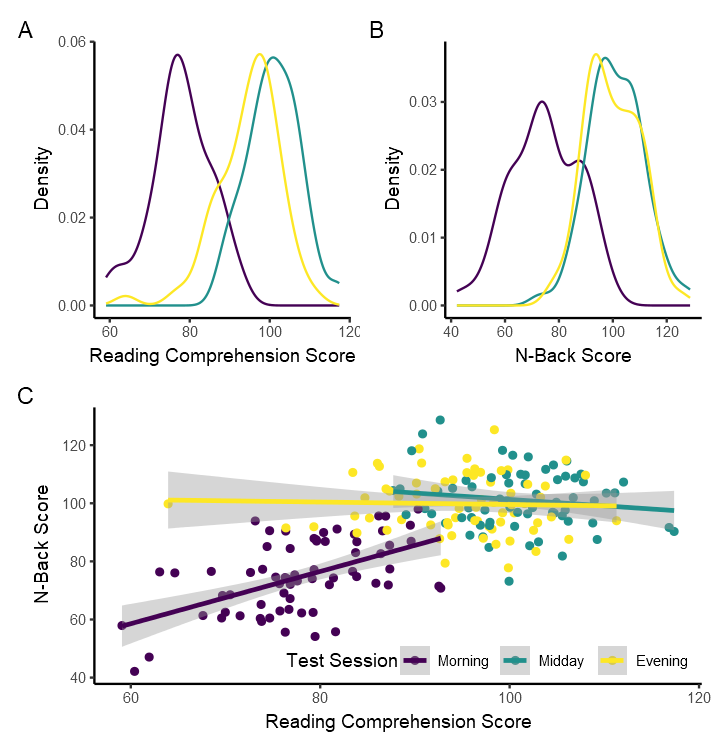

In [88]:
(dens_read | dens_memory) / scatter

Finally, here is the figure with an example caption that we might decide to use:

<br>

**Figure 1.**

*Relationship between scores in the Reading Comprehension and N-Back tasks, at the three session times.*

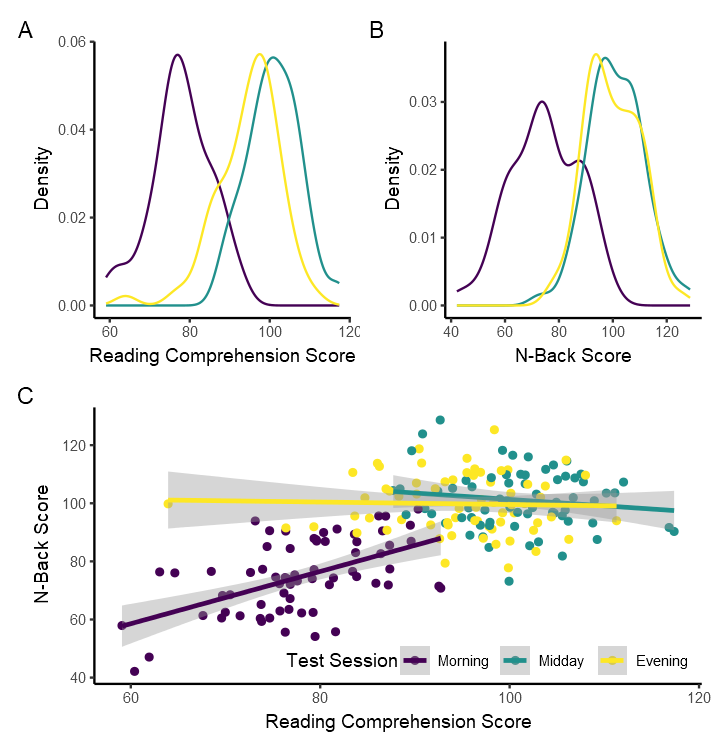

In [89]:
(dens_read | dens_memory) / scatter

The upper two panels (**A**, **B**) show the densities of scores. The lower panel (**C**) shows the correlations between scores in the two tasks in each of the three session times. Each point depicts one participant, and the lines depict the linear relationships. Shaded grey intervals depict 95% Confidence Intervals.